The dataset used in this notebook can be downloaded on this link: https://archive.ics.uci.edu/ml/datasets/parkinsons

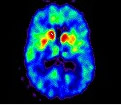

In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
from IPython.core.display import Image
Image(filename='brain-activity.jpg')

In [93]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
simplefilter(action='ignore', category=DeprecationWarning)

In [94]:
parkinson_data = pd.read_csv("parkinsons_data.txt")

In [95]:
parkinson_data.head()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


## Step 1 Data preprocessing

Steps that we need to do with this data before doing the prediction part:
    1. Split data to Features and labels
    2. Scale features to the same scale
    3. Split data into training and testing portion
    B. Bonus will be to find what features are most 'importatnt'

###  Step 1.1 Features vs Labels

In [96]:
labels = parkinson_data.iloc[:, 0].values
features = parkinson_data.iloc[:, 1:].values

In [97]:
print(features.shape)
print(labels[0])

(5875, 21)
1


### Step 1.2 Scale data

In [98]:
from sklearn.preprocessing import StandardScaler

In [99]:
scaler = StandardScaler()
scled_features = scaler.fit_transform(features)

### Step 1.3 Splitting data into Training and test portions

In [100]:
from sklearn.model_selection import train_test_split

In [101]:
X_train, X_test, y_train, y_test = train_test_split(scled_features, labels, test_size=0.3)

In [102]:
print("X_train shape -- > {}".format(X_train.shape))
print("y_train shape -- > {}".format(y_train.shape))
print("X_test shape -- > {}".format(X_test.shape))
print("y_test shape -- > {}".format(y_test.shape))

X_train shape -- > (4112, 21)
y_train shape -- > (4112,)
X_test shape -- > (1763, 21)
y_test shape -- > (1763,)


### Step 1.B (Optional) Feature engineering (selection)

In [103]:
from sklearn.ensemble import ExtraTreesClassifier

In [104]:
etc = ExtraTreesClassifier(n_estimators=300)

In [105]:
etc.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=300,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [106]:
print(etc.feature_importances_)
indices = np.argsort(etc.feature_importances_)[::-1]

[0.28492576 0.05669009 0.02557723 0.12117117 0.12460125 0.01710184
 0.02934429 0.01591448 0.01849381 0.01593078 0.01885947 0.0179996
 0.01934337 0.0198795  0.01999814 0.01900555 0.01577864 0.03214529
 0.0303261  0.07061786 0.0262958 ]


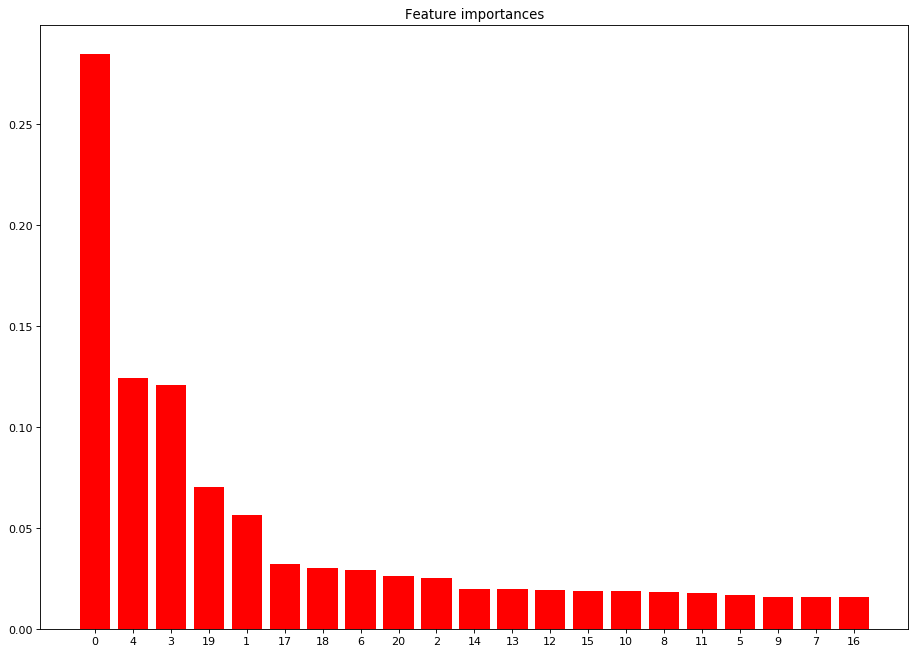

In [107]:
plt.figure(num=None, figsize=(14, 10), dpi=80, facecolor='w')
plt.title("Feature importances")
plt.bar(range(features.shape[1]), etc.feature_importances_[indices],
       color="r", align="center")
plt.xticks(range(features.shape[1]), indices)
plt.show()

## Step 2 Prediction

### Step 2.1 Simple algorithms

In [108]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

#### Step 2.1.1 KNN

In [109]:
from sklearn.neighbors import KNeighborsClassifier

In [110]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [111]:
print("KNN with k=5 got {}% accuracy on the test set.".format(accuracy_score(y_test, knn.predict(X_test))*100))

KNN with k=5 got 91.03800340328985% accuracy on the test set.


##### Step 2.1.1.1 KNN Grid search

In [112]:
params_dict = {'n_neighbors':[3, 5, 9, 15], 'p':[1, 2, 3], 'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']}
gs = GridSearchCV(knn, param_grid=params_dict, verbose=10, cv=10)

In [113]:
gs.fit(X_train, y_train)

Fitting 10 folds for each of 48 candidates, totalling 480 fits
[CV] algorithm=auto, n_neighbors=3, p=1 ..............................
[CV] .. algorithm=auto, n_neighbors=3, p=1, score=0.916, total=   0.1s
[CV] algorithm=auto, n_neighbors=3, p=1 ..............................
[CV] .. algorithm=auto, n_neighbors=3, p=1, score=0.911, total=   0.0s
[CV] algorithm=auto, n_neighbors=3, p=1 ..............................
[CV] .. algorithm=auto, n_neighbors=3, p=1, score=0.943, total=   0.0s
[CV] algorithm=auto, n_neighbors=3, p=1 ..............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV] .. algorithm=auto, n_neighbors=3, p=1, score=0.907, total=   0.1s
[CV] algorithm=auto, n_neighbors=3, p=1 ..............................
[CV] .. algorithm=auto, n_neighbors=3, p=1, score=0.930, total=   0.0s
[CV] algorithm=auto, n_neighbors=3, p=1 ..............................
[CV] .. algorithm=auto, n_neighbors=3, p=1, score=0.910, total=   0.0s
[CV] algorithm=auto, n_neighbors=3, p=1 ..............................
[CV] .. algorithm=auto, n_neighbors=3, p=1, score=0.914, total=   0.0s
[CV] algorithm=auto, n_neighbors=3, p=1 ..............................
[CV] .. algorithm=auto, n_neighbors=3, p=1, score=0.925, total=   0.0s


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.3s remaining:    0.0s


[CV] algorithm=auto, n_neighbors=3, p=1 ..............................
[CV] .. algorithm=auto, n_neighbors=3, p=1, score=0.914, total=   0.1s
[CV] algorithm=auto, n_neighbors=3, p=1 ..............................
[CV] .. algorithm=auto, n_neighbors=3, p=1, score=0.906, total=   0.0s
[CV] algorithm=auto, n_neighbors=3, p=2 ..............................
[CV] .. algorithm=auto, n_neighbors=3, p=2, score=0.909, total=   0.0s
[CV] algorithm=auto, n_neighbors=3, p=2 ..............................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.4s remaining:    0.0s


[CV] .. algorithm=auto, n_neighbors=3, p=2, score=0.889, total=   0.1s
[CV] algorithm=auto, n_neighbors=3, p=2 ..............................
[CV] .. algorithm=auto, n_neighbors=3, p=2, score=0.941, total=   0.1s
[CV] algorithm=auto, n_neighbors=3, p=2 ..............................
[CV] .. algorithm=auto, n_neighbors=3, p=2, score=0.924, total=   0.1s
[CV] algorithm=auto, n_neighbors=3, p=2 ..............................
[CV] .. algorithm=auto, n_neighbors=3, p=2, score=0.925, total=   0.0s
[CV] algorithm=auto, n_neighbors=3, p=2 ..............................
[CV] .. algorithm=auto, n_neighbors=3, p=2, score=0.912, total=   0.1s
[CV] algorithm=auto, n_neighbors=3, p=2 ..............................
[CV] .. algorithm=auto, n_neighbors=3, p=2, score=0.909, total=   0.0s
[CV] algorithm=auto, n_neighbors=3, p=2 ..............................
[CV] .. algorithm=auto, n_neighbors=3, p=2, score=0.912, total=   0.0s
[CV] algorithm=auto, n_neighbors=3, p=2 ..............................
[CV] .

[CV] .. algorithm=auto, n_neighbors=9, p=2, score=0.883, total=   0.1s
[CV] algorithm=auto, n_neighbors=9, p=2 ..............................
[CV] .. algorithm=auto, n_neighbors=9, p=2, score=0.899, total=   0.1s
[CV] algorithm=auto, n_neighbors=9, p=2 ..............................
[CV] .. algorithm=auto, n_neighbors=9, p=2, score=0.936, total=   0.1s
[CV] algorithm=auto, n_neighbors=9, p=2 ..............................
[CV] .. algorithm=auto, n_neighbors=9, p=2, score=0.900, total=   0.1s
[CV] algorithm=auto, n_neighbors=9, p=2 ..............................
[CV] .. algorithm=auto, n_neighbors=9, p=2, score=0.901, total=   0.1s
[CV] algorithm=auto, n_neighbors=9, p=2 ..............................
[CV] .. algorithm=auto, n_neighbors=9, p=2, score=0.880, total=   0.1s
[CV] algorithm=auto, n_neighbors=9, p=2 ..............................
[CV] .. algorithm=auto, n_neighbors=9, p=2, score=0.904, total=   0.1s
[CV] algorithm=auto, n_neighbors=9, p=2 ..............................
[CV] .

[CV]  algorithm=ball_tree, n_neighbors=3, p=2, score=0.889, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=3, p=2 .........................
[CV]  algorithm=ball_tree, n_neighbors=3, p=2, score=0.941, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=3, p=2 .........................
[CV]  algorithm=ball_tree, n_neighbors=3, p=2, score=0.924, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=3, p=2 .........................
[CV]  algorithm=ball_tree, n_neighbors=3, p=2, score=0.925, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=3, p=2 .........................
[CV]  algorithm=ball_tree, n_neighbors=3, p=2, score=0.912, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=3, p=2 .........................
[CV]  algorithm=ball_tree, n_neighbors=3, p=2, score=0.909, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=3, p=2 .........................
[CV]  algorithm=ball_tree, n_neighbors=3, p=2, score=0.912, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=3, p=2 ...........

[CV]  algorithm=ball_tree, n_neighbors=9, p=2, score=0.899, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=9, p=2 .........................
[CV]  algorithm=ball_tree, n_neighbors=9, p=2, score=0.936, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=9, p=2 .........................
[CV]  algorithm=ball_tree, n_neighbors=9, p=2, score=0.900, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=9, p=2 .........................
[CV]  algorithm=ball_tree, n_neighbors=9, p=2, score=0.901, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=9, p=2 .........................
[CV]  algorithm=ball_tree, n_neighbors=9, p=2, score=0.880, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=9, p=2 .........................
[CV]  algorithm=ball_tree, n_neighbors=9, p=2, score=0.904, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=9, p=2 .........................
[CV]  algorithm=ball_tree, n_neighbors=9, p=2, score=0.910, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=9, p=2 ...........

[CV]  algorithm=kd_tree, n_neighbors=3, p=1, score=0.906, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=3, p=2 ...........................
[CV]  algorithm=kd_tree, n_neighbors=3, p=2, score=0.909, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=3, p=2 ...........................
[CV]  algorithm=kd_tree, n_neighbors=3, p=2, score=0.889, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=3, p=2 ...........................
[CV]  algorithm=kd_tree, n_neighbors=3, p=2, score=0.941, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=3, p=2 ...........................
[CV]  algorithm=kd_tree, n_neighbors=3, p=2, score=0.924, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=3, p=2 ...........................
[CV]  algorithm=kd_tree, n_neighbors=3, p=2, score=0.925, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=3, p=2 ...........................
[CV]  algorithm=kd_tree, n_neighbors=3, p=2, score=0.912, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=3, p=2 ...........................

[CV]  algorithm=kd_tree, n_neighbors=9, p=1, score=0.910, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=9, p=1 ...........................
[CV]  algorithm=kd_tree, n_neighbors=9, p=1, score=0.926, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=9, p=1 ...........................
[CV]  algorithm=kd_tree, n_neighbors=9, p=1, score=0.906, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=9, p=2 ...........................
[CV]  algorithm=kd_tree, n_neighbors=9, p=2, score=0.883, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=9, p=2 ...........................
[CV]  algorithm=kd_tree, n_neighbors=9, p=2, score=0.899, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=9, p=2 ...........................
[CV]  algorithm=kd_tree, n_neighbors=9, p=2, score=0.936, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=9, p=2 ...........................
[CV]  algorithm=kd_tree, n_neighbors=9, p=2, score=0.900, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=9, p=2 ...........................

[CV] . algorithm=brute, n_neighbors=3, p=1, score=0.914, total=   0.1s
[CV] algorithm=brute, n_neighbors=3, p=1 .............................
[CV] . algorithm=brute, n_neighbors=3, p=1, score=0.925, total=   0.0s
[CV] algorithm=brute, n_neighbors=3, p=1 .............................
[CV] . algorithm=brute, n_neighbors=3, p=1, score=0.914, total=   0.1s
[CV] algorithm=brute, n_neighbors=3, p=1 .............................
[CV] . algorithm=brute, n_neighbors=3, p=1, score=0.906, total=   0.0s
[CV] algorithm=brute, n_neighbors=3, p=2 .............................
[CV] . algorithm=brute, n_neighbors=3, p=2, score=0.909, total=   0.1s
[CV] algorithm=brute, n_neighbors=3, p=2 .............................
[CV] . algorithm=brute, n_neighbors=3, p=2, score=0.889, total=   0.0s
[CV] algorithm=brute, n_neighbors=3, p=2 .............................
[CV] . algorithm=brute, n_neighbors=3, p=2, score=0.941, total=   0.0s
[CV] algorithm=brute, n_neighbors=3, p=2 .............................
[CV] .

[CV] . algorithm=brute, n_neighbors=9, p=1, score=0.892, total=   0.1s
[CV] algorithm=brute, n_neighbors=9, p=1 .............................
[CV] . algorithm=brute, n_neighbors=9, p=1, score=0.921, total=   0.1s
[CV] algorithm=brute, n_neighbors=9, p=1 .............................
[CV] . algorithm=brute, n_neighbors=9, p=1, score=0.910, total=   0.1s
[CV] algorithm=brute, n_neighbors=9, p=1 .............................
[CV] . algorithm=brute, n_neighbors=9, p=1, score=0.926, total=   0.1s
[CV] algorithm=brute, n_neighbors=9, p=1 .............................
[CV] . algorithm=brute, n_neighbors=9, p=1, score=0.906, total=   0.1s
[CV] algorithm=brute, n_neighbors=9, p=2 .............................
[CV] . algorithm=brute, n_neighbors=9, p=2, score=0.883, total=   0.1s
[CV] algorithm=brute, n_neighbors=9, p=2 .............................
[CV] . algorithm=brute, n_neighbors=9, p=2, score=0.899, total=   0.1s
[CV] algorithm=brute, n_neighbors=9, p=2 .............................
[CV] .

[Parallel(n_jobs=1)]: Done 480 out of 480 | elapsed:  2.7min finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 5, 9, 15], 'p': [1, 2, 3]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=10)

In [114]:
print(gs.best_estimator_)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=1,
                     weights='uniform')


In [115]:
new_knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=1,
           weights='uniform')
new_knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=1, n_neighbors=3, p=1,
                     weights='uniform')

In [116]:
print("KNN - fine tuned, got {}% accuracy on the test set.".format(accuracy_score(y_test, new_knn.predict(X_test))*100))

KNN - fine tuned, got 92.45604083947816% accuracy on the test set.


#### Step 2.1.2 Logistic Regression

In [117]:
from sklearn.linear_model import LogisticRegression

In [118]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [119]:
print("Logistic regression - default, got {}% accuracy on the test set.".format(accuracy_score(y_test, lr.predict(X_test))*100))

Logistic regression - default, got 91.88882586500283% accuracy on the test set.


In [120]:
lr_tuned = LogisticRegression(C=1000, penalty='l2')
lr_tuned.fit(X_train, y_train)

LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [121]:
print("Logistic regression - tuned, got {}% accuracy on the test set.".format(accuracy_score(y_test, lr_tuned.predict(X_test))*100))

Logistic regression - tuned, got 94.10096426545661% accuracy on the test set.


## Step 2.2 Tree and forest classifiers

### Step 2.2.1 Tree Classifier

In [122]:
from sklearn.tree import DecisionTreeClassifier

In [123]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [124]:
print("Decision tree classifier, got {}% accuracy on the test set.".format(accuracy_score(y_test, dtc.predict(X_test))*100))

Decision tree classifier, got 98.69540555870675% accuracy on the test set.


### Steo 2.2.2 Forest

In [125]:
from sklearn.ensemble import RandomForestClassifier

In [126]:
rfc = RandomForestClassifier(n_estimators=350)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=350,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [127]:
print("Random forest classifier, got {}% accuracy on the test set.".format(accuracy_score(y_test, rfc.predict(X_test))*100))

Random forest classifier, got 98.52524106636416% accuracy on the test set.


## Summary:

In this task as you can see the best overall performance (accuracy) on the test set had Tree classifier. Right behind it Random Forest Classifier showed great accuracy with 98%

In [128]:
accuracy_tree = cross_val_score(dtc, scled_features, labels, scoring='accuracy', cv=10)

In [129]:
print(np.mean(accuracy_tree)*100)

98.87522917705549
